In [1]:
# Hierarchical Clustering

# The algorithm uses the distance metric it calculates to predict sugroups

# To guess the number of subgroups in a dataset, first look
# at a dendogram visualization of the clustering results

# What's a dendrogram you hesitate to ask?
# Well, it's a tree graph that's useful for visually displaying
# taxonomies, lineages, and relatedness

In [2]:
# Use cases of Hierarchical Clustering

# 1) Hospital Resource Management
# 2) Business Process Management
# 3) Customer Segmentation
# 4) Social Network Analysis

In [3]:
# Parameters:

# Distance Metrics
# Euclidean, Manhattan, Cosine

# Linkage Parameters
# Ward, Complete, Average

# Parameter selection method: use trial and error

In [5]:
# importing libraries for Hierarchical Clustering Example

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

In [8]:
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [10]:
np.set_printoptions(precision=4, suppress=True)

plt.figure(figsize=(10,3))

%matplotlib inline
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_43887/3071949272.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [15]:
address = './Data/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']

X = cars[['mpg','disp','hp','wt']].values
y = cars.iloc[:,(9)].values

In [12]:
# Using scipy to generate a dendrogram

Z = linkage(X,'ward')

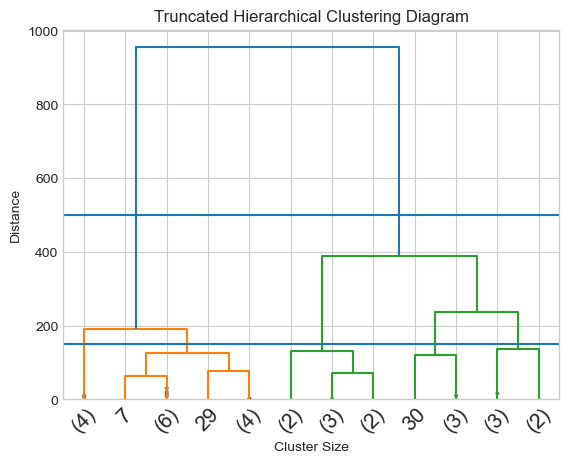

In [13]:
dendrogram(Z, truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title('Truncated Hierarchical Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [16]:
# Generating hierarchical clusters

k=2

Hclustering = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

/usr/lib/python3/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.78125

In [17]:
Hclustering = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

/usr/lib/python3/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.78125

In [19]:
Hclustering = AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

/usr/lib/python3/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.71875